In [25]:
# LT: Exclude DepDelay + Weather
# Classification: Predict if arrdelay > 0

# Import Necessary Package here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import gc

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier

import matplotlib.pyplot as plt

# Data Import

In [2]:
# Load CSV 
df = pd.read_csv(r"C:\ORIE4741 Data\2016_to_2020_flight_feature_eng_w_DestState.csv")

In [3]:
df = df.drop('Unnamed: 0', axis = 1)
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DepDelay', 'ArrDelay', 'CRSElapsedTime',
       'Distance', 'Severe-Cold_Severity', 'Fog_Severity', 'Hail_Severity',
       ...
       'DestState_TN', 'DestState_TX', 'DestState_UT', 'DestState_VA',
       'DestState_VI', 'DestState_VT', 'DestState_WA', 'DestState_WI',
       'DestState_WV', 'DestState_WY'],
      dtype='object', length=112)

In [4]:
# Check all columns are in numeric form
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

Series([], dtype: object)

In [5]:
# Check NA value 
df.isnull().values.any()

False

In [6]:
df['is_late'] = df['ArrDelay'] > 0
df = df.drop(columns = ['ArrDelay'])

In [7]:
# Inspect all columns
pd.set_option('display.max_columns', None)
df.head() 

,Year,Month,DayofMonth,DepDelay,CRSElapsedTime,Distance,Severe-Cold_Severity,Fog_Severity,Hail_Severity,Rain_Severity,Snow_Severity,Storm_Severity,Other Precipitation_Severity,CRSDep_afternoon,CRSDep_midnight,CRSDep_morning,CRSDep_night,CRSArr_afternoon,CRSArr_midnight,CRSArr_morning,CRSArr_night,Q1,Q2,Q3,Q4,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_DL,Airline_EV,Airline_F9,Airline_G4,Airline_HA,Airline_MQ,Airline_NK,Airline_OH,Airline_OO,Airline_UA,Airline_VX,Airline_WN,Airline_YV,Airline_YX,Origin_F9,Origin_HA,Origin_UA,Origin_AA,Origin_OO,Origin_VX,Origin_WN,Origin_B6,Origin_DL,Origin_AS,DestState_AK,DestState_AL,DestState_AR,DestState_AZ,DestState_CA,DestState_CO,DestState_CT,DestState_FL,DestState_GA,DestState_HI,DestState_IA,DestState_ID,DestState_IL,DestState_IN,DestState_KS,DestState_KY,DestState_LA,DestState_MA,DestState_MD,DestState_ME,DestState_MI,DestState_MN,DestState_MO,DestState_MS,DestState_MT,DestState_NC,DestState_ND,DestState_NE,DestState_NH,DestState_NJ,DestState_NM,DestState_NV,DestState_NY,DestState_OH,DestState_OK,DestState_OR,DestState_PA,DestState_PR,DestState_RI,DestState_SC,DestState_SD,DestState_TN,DestState_TX,DestState_UT,DestState_VA,DestState_VI,DestState_VT,DestState_WA,DestState_WI,DestState_WV,DestState_WY,is_late
0,2016,1,6,-3.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,2016,1,7,-4.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,2016,1,8,-5.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
3,2016,1,9,2.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,2016,1,10,100.0,158.0,986.0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


# Feature Selection
As discussed in porposal, we will have two models, one predicting delay before passengers arrive at the airport, and the other one predict delay using all data avaliable until the plane left the ground.

Here, some columns contain data that will only be avaliable when the passengers board the plane (like DepDelay and Weather). We cannot use them in our long-run forecase, but we can include them in our short-run forecast.

In [8]:
weather_columns = ['Severe-Cold', 'Fog', 'Hail', 'Rain', 'Snow', 'Storm', 'Other Precipitation']
ST_columns = ['DepDelay'] + [i + '_Severity' for i in weather_columns]
df_LT = df[df.columns.difference(ST_columns)]
# df_ST = df

In [9]:
del [[df]]
gc.collect()

30

# Long Term Model Experimentation
## Linear regression
As a start, we will fit a simple linear regression with y = ArrDelay

In [10]:
# Specify X and y
X = df_LT.drop(columns = ['is_late'])
y = pd.DataFrame(df_LT['is_late'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X.shape

(8988665, 103)

In [22]:
model = LinearRegression(n_jobs = 5)
model.fit(X_train,y_train)

LinearRegression(n_jobs=5)

In [23]:
# See Train MSE
y_train_pred = model.predict(X_train)
mean_squared_error(y_train, y_train_pred)

2015.6592233360489

In [24]:
# See Test MSE
y_test_pred = model.predict(X_test)
mean_squared_error(y_test, y_test_pred)

2012.8790461476956

In [25]:
# See Simple Average MSE
y_simple_average = np.mean(y_train)
mean_squared_error(y_test, np.ones((len(y_test.index),1))*y_simple_average.item())

2053.7909526461626

In [ ]:
y_test_pred[:5]

In [ ]:
y_test[:5]

As one can see, the MSE of the model is not significantly better than simply guessing the mean. Linear model may be too simple to capture the necessary trend for the flight delay. Since Test MSE is actually lower than train MSE, we believe the size of our dataset and complexity of the problem has made **underfitting** a more likely issue.

To prevent underfitting, we will use **more expressive** models like trees/Random Forest/Neural Netwroks mostly in our following researches. 

## Simple Decision Tree

In [12]:
simple_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight="balanced")
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [13]:
def plot_feature_importances(model, feature_names):
    n_features = len(feature_names)
    plt.figure(figsize=(10, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.grid(True)
    


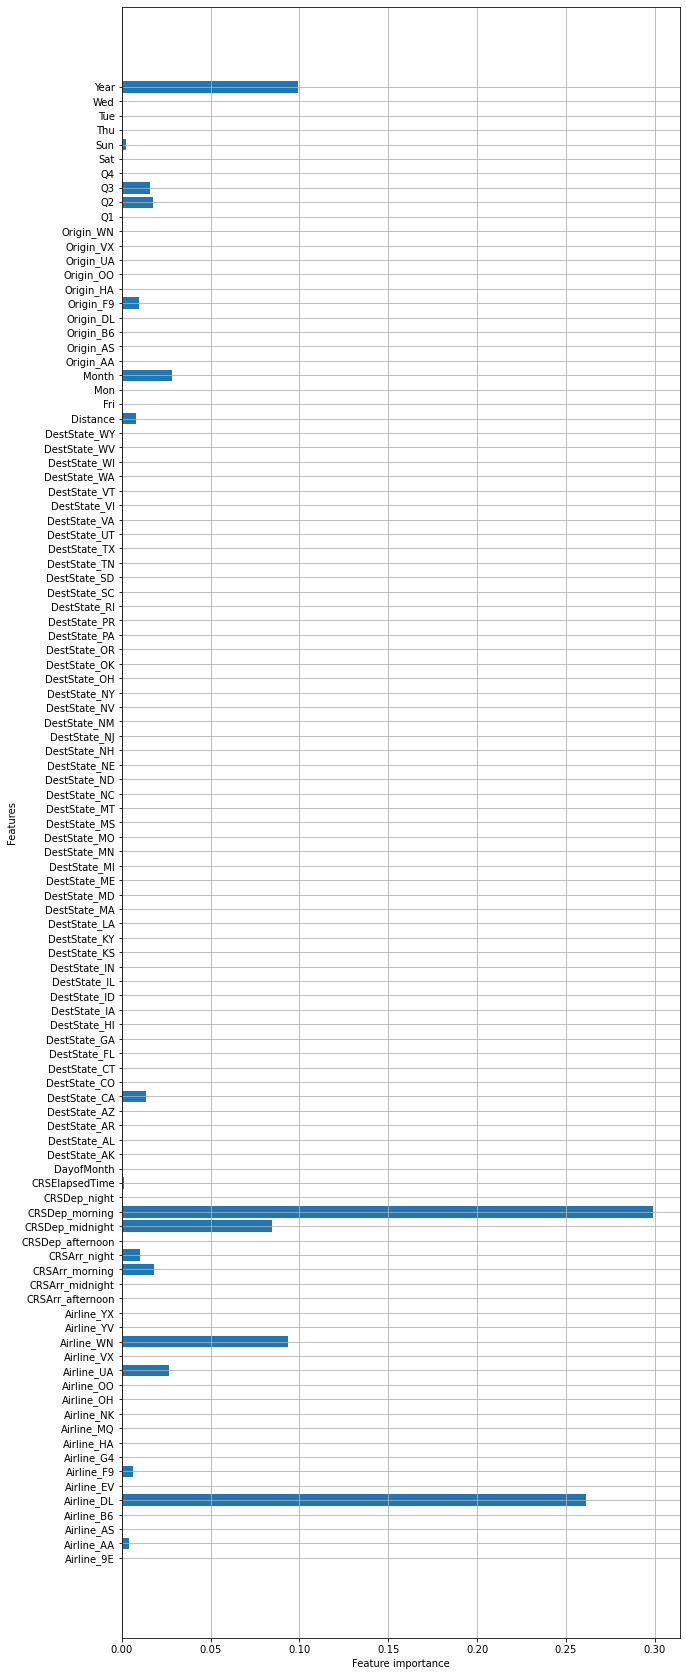

In [14]:
feature_names = X_train.columns.values
plot_feature_importances(simple_tree, feature_names)

In [17]:
# See Train 
pred = simple_tree.predict(X_train)

In [22]:
pd.crosstab(y_train.values.ravel(), pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,2516601,2057614,4574215
True,1099604,1517113,2616717
All,3616205,3574727,7190932


In [27]:
print(classification_report(y_train.values.ravel(), pred))

              precision    recall  f1-score   support

       False       0.70      0.55      0.61   4574215
        True       0.42      0.58      0.49   2616717

    accuracy                           0.56   7190932
   macro avg       0.56      0.56      0.55   7190932
weighted avg       0.60      0.56      0.57   7190932



## Random Forest

In [28]:
forest = RandomForestClassifier(n_estimators = 50, max_depth = 7, n_jobs = 8, verbose = 2, max_features = 'sqrt', max_samples = 0.8)

In [30]:
forest.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50
building tree 4 of 50

building tree 5 of 50building tree 6 of 50


building tree 7 of 50building tree 8 of 50

building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   59.4s


building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomForestClassifier(max_depth=7, max_features='sqrt', max_samples=0.8,
                       n_estimators=50, n_jobs=8, verbose=2)

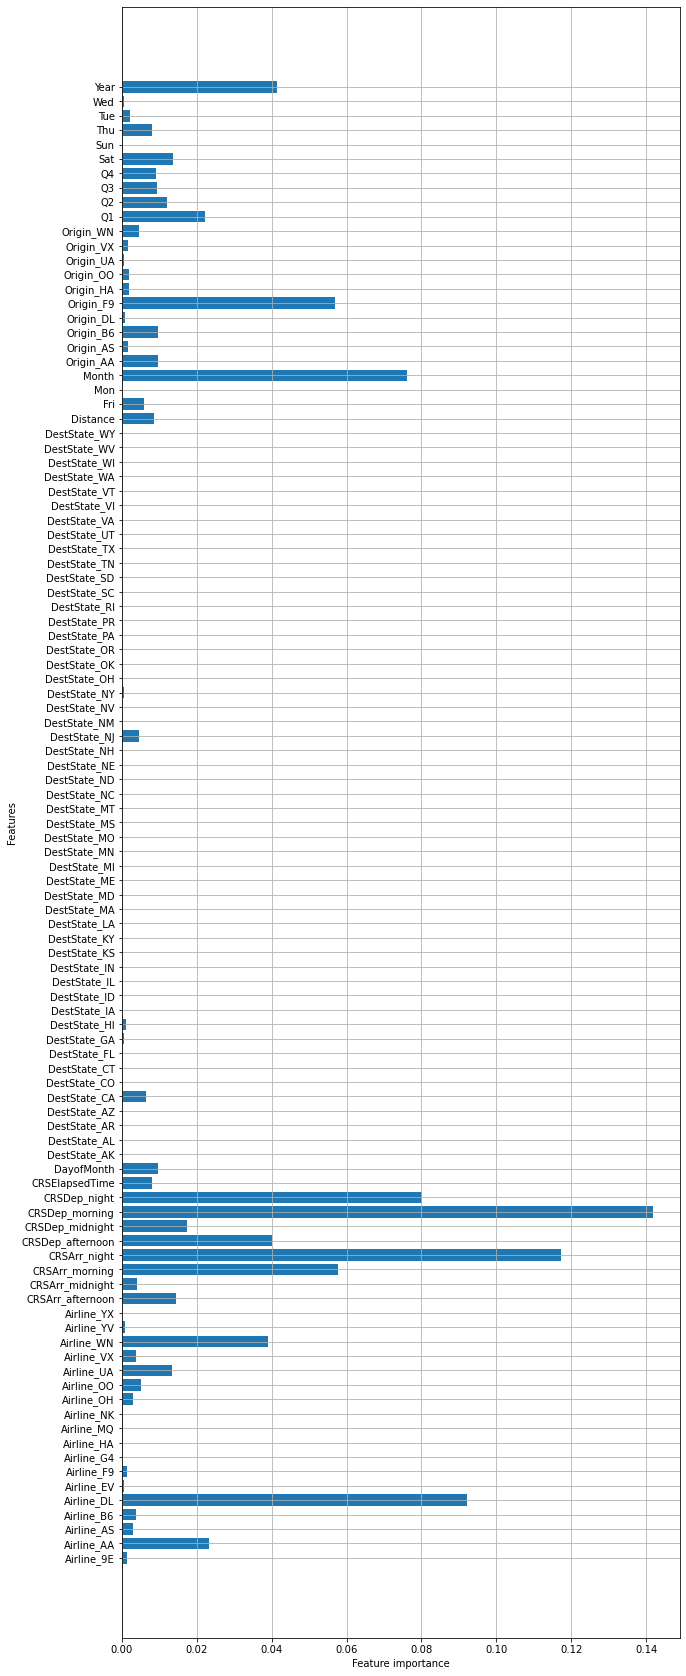

In [32]:
feature_names = X_train.columns.values
plot_feature_importances(forest, feature_names)

In [33]:
# See Train 
pred = forest.predict(X_train)
print(classification_report(y_train.values.ravel(), pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    5.0s finished


              precision    recall  f1-score   support

       False       0.64      1.00      0.78   4574215
        True       0.71      0.00      0.00   2616717

    accuracy                           0.64   7190932
   macro avg       0.67      0.50      0.39   7190932
weighted avg       0.66      0.64      0.50   7190932

